> PROBLEMA DE NEGÓCIO:
- O objetivo é analisar as características de clientes com base no padrão de compras em um Shopping Center
- **Dataset**: dataset3

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

> Para não precisarmos editar os gráficos posteriormente já criamos uma customização padrão

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

In [3]:
# Carrgando os dados
dados = pd.read_csv('dados/dataset3.csv')

In [4]:
# Dimensões do dataset
dados.shape

(2240, 28)

In [5]:
dados.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
# Variáveis e seus tipos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
dados.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

> A variável 'Income' está com um ' ' antes da sua primeira letra, o que pode ocasionar o erro, faremos a correção

In [8]:
# Renomeando a coluna
dados.rename({' Income ' : 'Income'}, axis = 1, inplace = True)

In [9]:
# Removendo $ e , dos dados
dados['Income'] = dados['Income'].str.replace('$', '')

In [10]:
# Convertendo os ddos em float
dados['Income'] = dados['Income'].str.replace(',', '').astype(float)

> Outro problema é a variável 'Dt_Customer', que refere-se à data de cadastro do usuário. Ela está como string, mas a converteremos para datetime

In [11]:
# Convertendo em datetime
dados['Dt_Customer'] = pd.to_datetime(dados['Dt_Customer'])

In [12]:
# Verificando valores ausentes
dados.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

> Substituindo os valores ausentes pela média, pois a quantidade é pequena

In [13]:
# Substituindo os valores ausentes pela média
dados['Income'] = dados['Income'].fillna(dados['Income'].mean())

> Que tal sabermos qual era a idade do usuário quando abriu a conta? Faremos uma engenharia de atributos para obter essa informação e plotar posteriormente

> Isso será interessante para no caso de, por exemplo, o padrão de compras do usuário que pode mudar conforme o tempo

In [14]:
dados['Customer_Age_When_Enrolled'] = dados['Dt_Customer'].dt.year - dados['Year_Birth']

In [15]:
dados[dados['Customer_Age_When_Enrolled'] >= 80]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,SA,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,SP,114
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,0,1,IND,113


> Outra análise interessante é calcular o total de gastos e de compras de cada usuário

In [16]:
# Total de gastos
dados['Total_Spent'] = (dados['MntFishProducts'] + 
                        dados['MntWines'] + 
                        dados['MntSweetProducts']
                       + dados['MntFruits'] + 
                       dados['MntMeatProducts'] + 
                       dados['MntGoldProds']
                       )

In [17]:
# # Total de compras
dados['Total Purchases'] = (dados['NumDealsPurchases'] + 
                            dados['NumWebPurchases'] + 
                            dados['NumStorePurchases'] +
                            dados['NumCatalogPurchases']
                            )

> Mais uma análise que pode ser interessante é saber se o usuário tem criança(Kidhome) ou adolescente(Teenhome) em casa, mas faremos uma única vafiável para essa informação

In [18]:
dados['Kids_Teen_at_home'] = dados['Kidhome'] + dados['Teenhome']

In [19]:
dados = dados.drop(['Kidhome', 'Teenhome'], axis = 1)

In [20]:
dados.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled,Total_Spent,Total Purchases,Kids_Teen_at_home
0,1826,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,...,0,0,0,1,0,SP,44,1190,15,0
1,1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,...,0,0,1,1,0,CA,53,577,18,0
2,10476,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,59,...,0,0,0,0,0,US,56,251,11,1
3,1386,1967,Graduation,Together,32474.0,2014-05-11,0,10,0,1,...,0,0,0,0,0,AUS,47,11,4,2
4,5371,1989,Graduation,Single,21474.0,2014-04-08,0,6,16,24,...,0,0,0,1,0,SP,25,91,8,1


In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2240 non-null   int64         
 1   Year_Birth                  2240 non-null   int64         
 2   Education                   2240 non-null   object        
 3   Marital_Status              2240 non-null   object        
 4   Income                      2240 non-null   float64       
 5   Dt_Customer                 2240 non-null   datetime64[ns]
 6   Recency                     2240 non-null   int64         
 7   MntWines                    2240 non-null   int64         
 8   MntFruits                   2240 non-null   int64         
 9   MntMeatProducts             2240 non-null   int64         
 10  MntFishProducts             2240 non-null   int64         
 11  MntSweetProducts            2240 non-null   int64       

## Visualizações

#### 01 - Boxplot da variável ano de nascimento

<AxesSubplot:>

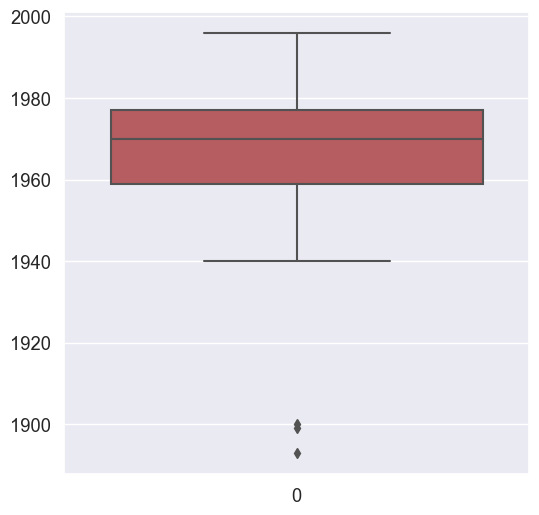

In [22]:
plt.figure(figsize = (6, 6))
sns.boxplot(data = dados['Year_Birth'], color = 'r')

> Notamos alguns outliers (nascidos por volta de 1900), eliminaremos estes do conjunto de dados

In [23]:
dados.shape

(2240, 30)

In [24]:
dados = dados[dados['Year_Birth'] >= 1920]

In [25]:
dados.shape

(2237, 30)

#### 02 - Violin Plot da variável ano de nascimento

<AxesSubplot:>

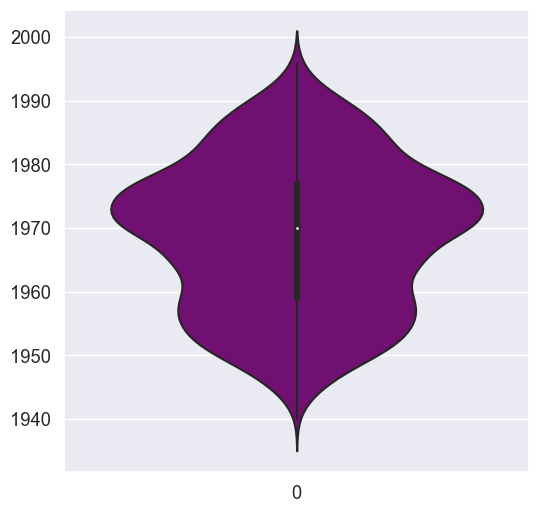

In [26]:
plt.figure(figsize = (6, 6))
sns.violinplot(data = dados['Year_Birth'], color = 'purple')

> Agora o gráfico exibe os usuários que nasceram entre 1940 e 2000, sendo a maioria na década de 70

#### 03 - Count Plot mostrando o nível de educação que efetuaram compras no shopping center

<AxesSubplot:xlabel='Education', ylabel='count'>

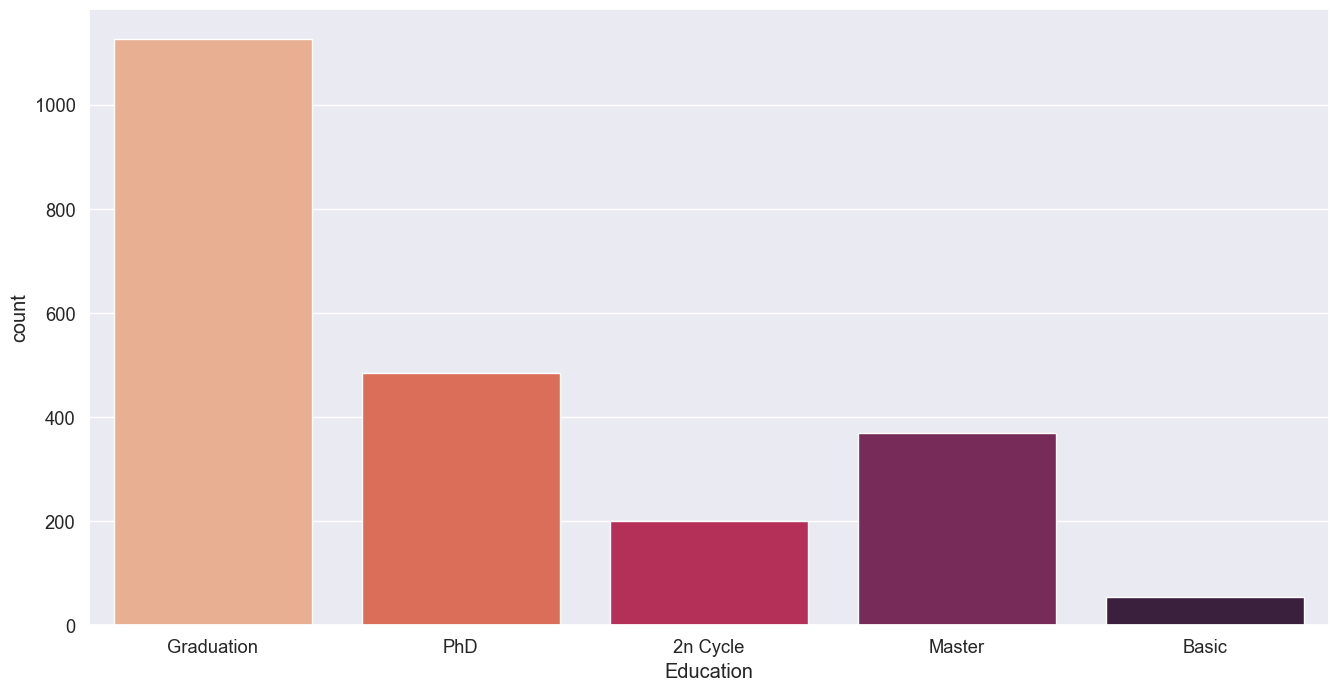

In [27]:
plt.figure(figsize = (16, 8))
sns.countplot(x = dados['Education'], palette = 'rocket_r')

#### 04 - Pie Chart da variável de estado civil

> Para plotar esse gráfico, precisaremos ajustar os dados

In [28]:
# Criamos uma variável chamada estado_civil, contamos os valores e convertermos para um dataframe chamado 'Count'
estado_civil = dados['Marital_Status'].value_counts().to_frame('Count')
estado_civil

,Count
Married,864
Together,579
Single,479
Divorced,231
Widow,77
Alone,3
YOLO,2
Absurd,2


> Criar o dataset 'alternativo' somente com a variável de interesse é uma boa prática, pois se evita lentidão no procesamento dentre outros entraves

In [29]:
type(estado_civil)

pandas.core.frame.DataFrame

In [30]:
dados['Income'].info

<bound method Series.info of 0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2237, dtype: float64>

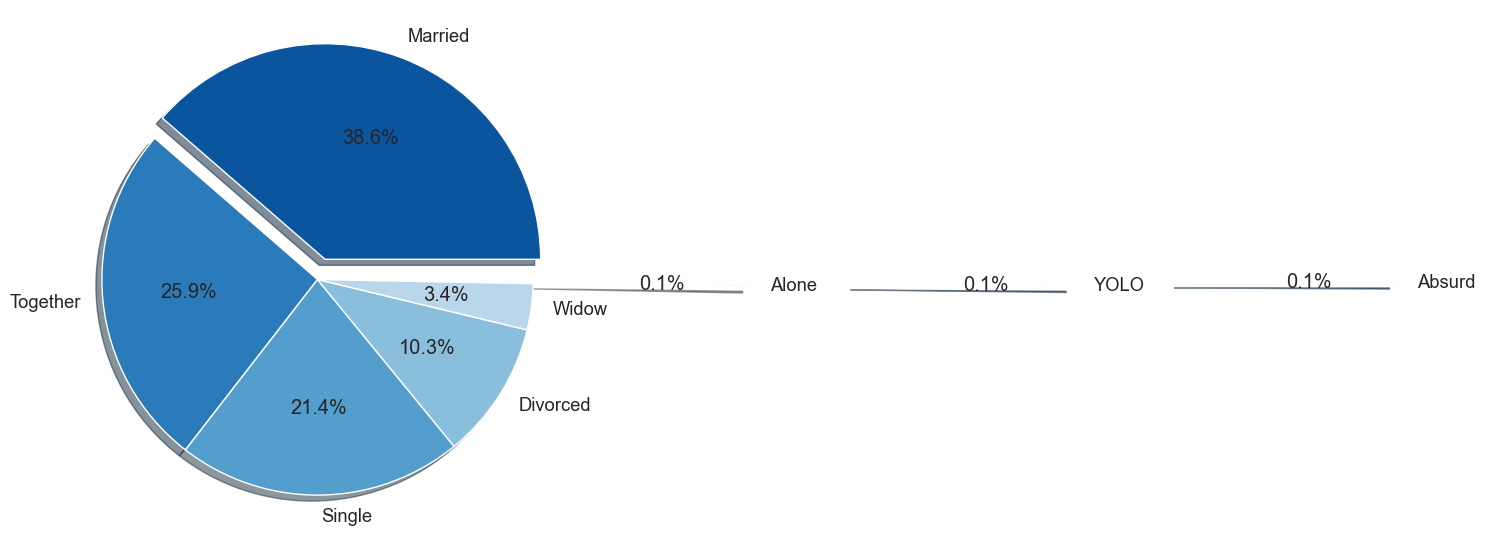

In [31]:
# Dataviz 16
sns.set_palette('Blues_r')
plt.figure(figsize = (7, 7))
plt.pie(estado_civil['Count'], 
        labels = estado_civil.index, 
        explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4),  # exibe as mínimas fatias lateralmente para não atrapalhar a visualização
        shadow = True, 
        autopct = '%1.1f%%') # porcentagem
plt.show()

#### 05 - Boxplot da variável 'Income'

In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          2237 non-null   int64         
 1   Year_Birth                  2237 non-null   int64         
 2   Education                   2237 non-null   object        
 3   Marital_Status              2237 non-null   object        
 4   Income                      2237 non-null   float64       
 5   Dt_Customer                 2237 non-null   datetime64[ns]
 6   Recency                     2237 non-null   int64         
 7   MntWines                    2237 non-null   int64         
 8   MntFruits                   2237 non-null   int64         
 9   MntMeatProducts             2237 non-null   int64         
 10  MntFishProducts             2237 non-null   int64         
 11  MntSweetProducts            2237 non-null   int64       

<AxesSubplot:>

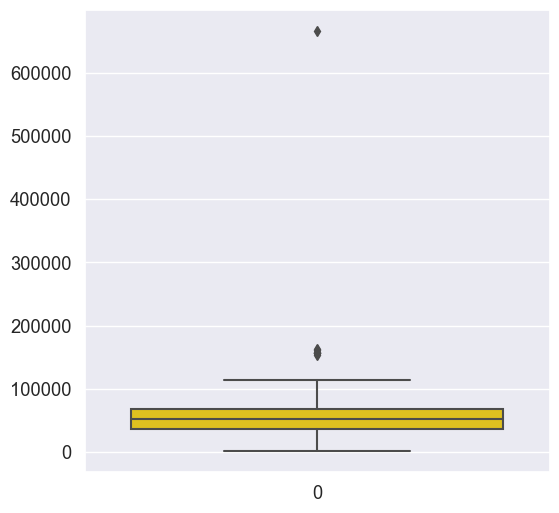

In [33]:
plt.figure(figsize = (6, 6))
sns.boxplot(data = dados['Income'], color = 'gold')

> Fica claro que não se trata de um gráfico de boa visualização para pessoas que não têm intimidaade com gráficos estatísticos, por isso, evite apresentar parapessoas leigas

> Os outliers prejudicaram a visualização. Neste caso, faremos a exclusão destes para melhorar a qualidade da visualização, usaremos também o distplot()

Text(0, 0.5, 'Densidade')

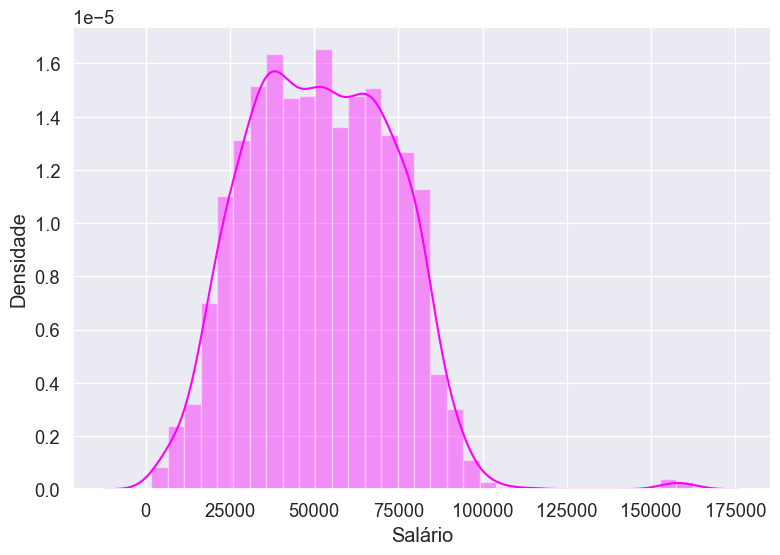

In [34]:
dados = dados[dados['Income'] < 200000]
plt.figure(figsize = (9,6))
sns.distplot(dados['Income'], color = 'magenta')
plt.xlabel('Salário')
plt.ylabel('Densidade')

#### 06 - Violin Plot com a relação da variável 'Income' com a variável 'Education'

> Aqui analisamos a relação com a graduação em relação ao nível educacional, nota-se que quanto maior o nivel educacional, mais o violino tendo a afinar e esticar

Text(0, 0.5, 'Salario')

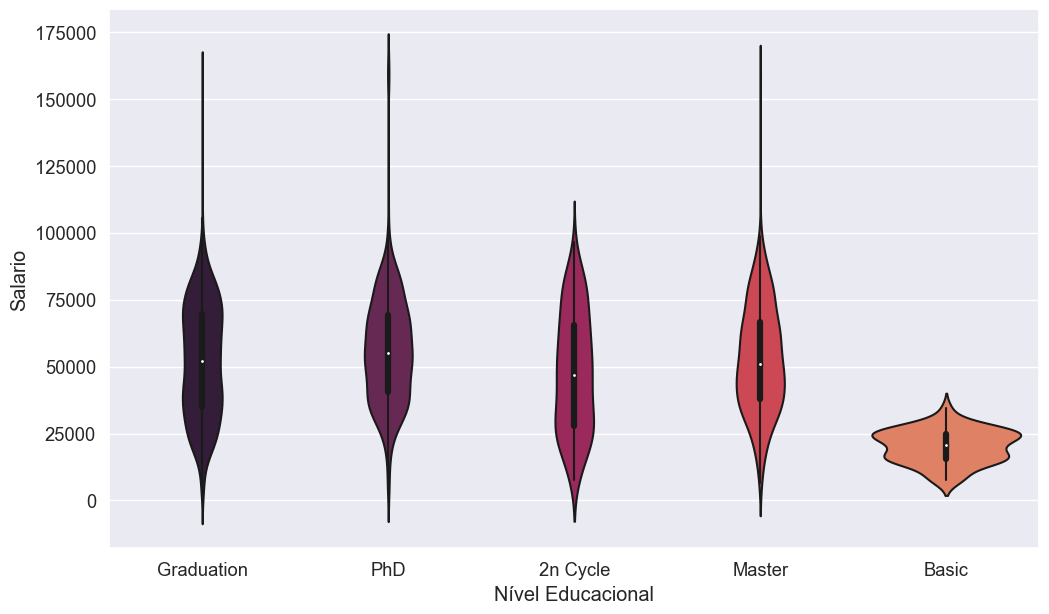

In [40]:
sns.set_palette('rocket')
plt.figure(figsize = (12, 7))
sns.violinplot(x = dados['Education'], y = dados['Income'])
plt.xlabel('Nível Educacional')
plt.ylabel('Salário')

#### 07 - Scatter Plot com a relação Income com a variável de gastos com produtos de ouro(MntGoldProds)

> Obviamente a conclusão seria de quanto maior o salário maiores os gastos com ouro

Text(0, 0.5, 'Gastos destinados a produtos de ouro')

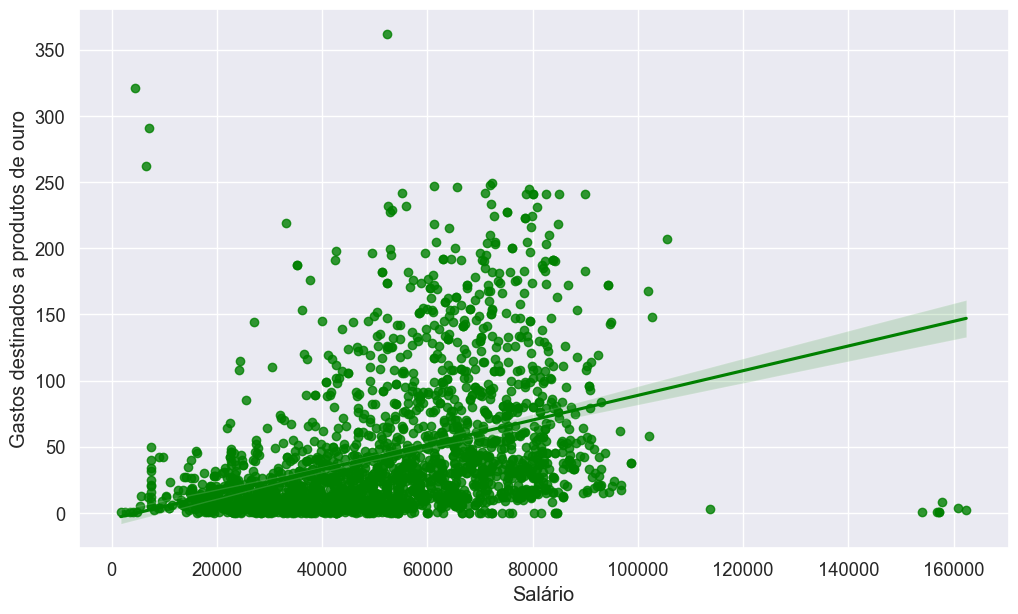

In [41]:
plt.figure(figsize = (12, 7))
sns.regplot(x = dados['Income'], y = dados['MntGoldProds'], color = 'green')
plt.xlabel('Salário')
plt.ylabel('Gastos destinados a produtos de ouro')

#### 08 - Scatter Plot com a relação da variável Income com a variável de gasto total (Total_Spent) em compas

> Aqui é uma análise interessante. Será mesmo que quem ganha mais é quem mais gasta?

Text(0, 0.5, 'Gastos Totais em Compras')

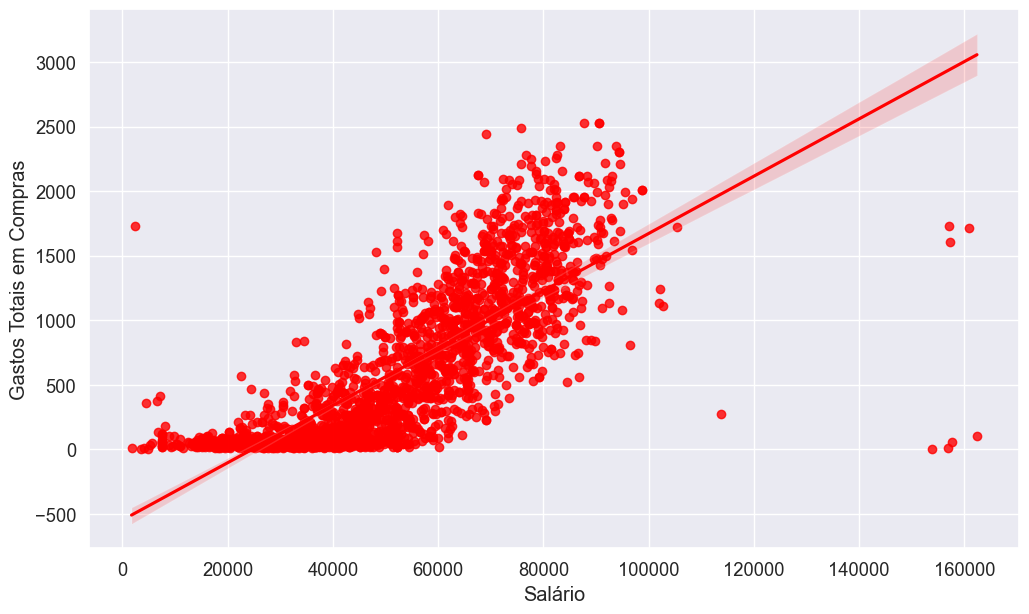

In [47]:
plt.figure(figsize= (12, 7))
sns.regplot(x = dados['Income'], y = dados['Total_Spent'], color = 'red')
plt.xlabel('Salário')
plt.ylabel('Gastos Totais em Compras')

#### 09 - Distplot da variável Customer_Age_When_Enrolled

> Aqui desejamos saber a distribuição das idades no momento da criação do cadastro e na análise notamos que maioria das pessoas tinha na faixa dos 40 anos.

Text(0, 0.5, 'Densidade')

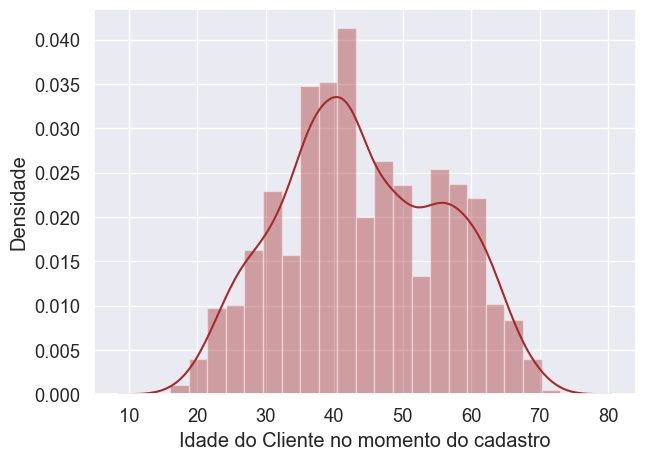

In [51]:
plt.figure(figsize = (7, 5))
sns.distplot(dados['Customer_Age_When_Enrolled'], color = 'brown')
plt.xlabel('Idade do Cliente no momento do cadastro')
plt.ylabel('Densidade')

#### 10 - Countplot da variável país (contabilizando clientes por país)

> Aqui o objetivo é contabilizar os clientes pelo país de origem. Pode surgir a dúvida sobre a não necessidade de outro eixo com os clientes:
> Isso se dá devido a cada linha do dataset ser um cliente, o countplot() faz um agrupamento dos paíse e exibe a informação

Text(0, 0.5, 'Densidade')

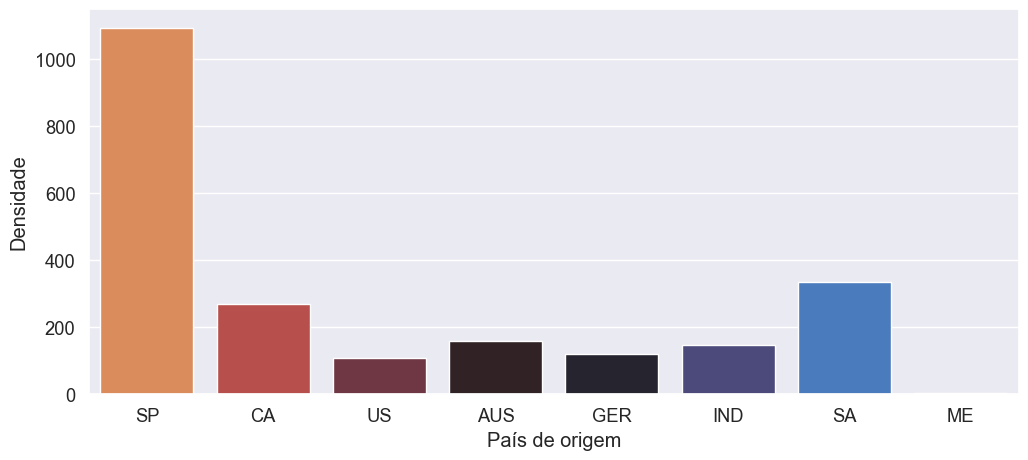

In [54]:
plt.figure(figsize = (12, 5))
sns.countplot(x = dados['Country'], palette = 'icefire_r')
plt.xlabel('País de origem')
plt.ylabel('Densidade')

#### 11 - Violin Plot com a relaçã: país x total de compras

> Nota-se nesse gráfico que o México é o que tem um padrão de compras menor, isso pode ser devido a um país mais pobre em comparação aos demais. Enquanto os EUA é o que tem um padrão mais alongado.

Text(0, 0.5, 'Total de Compras')

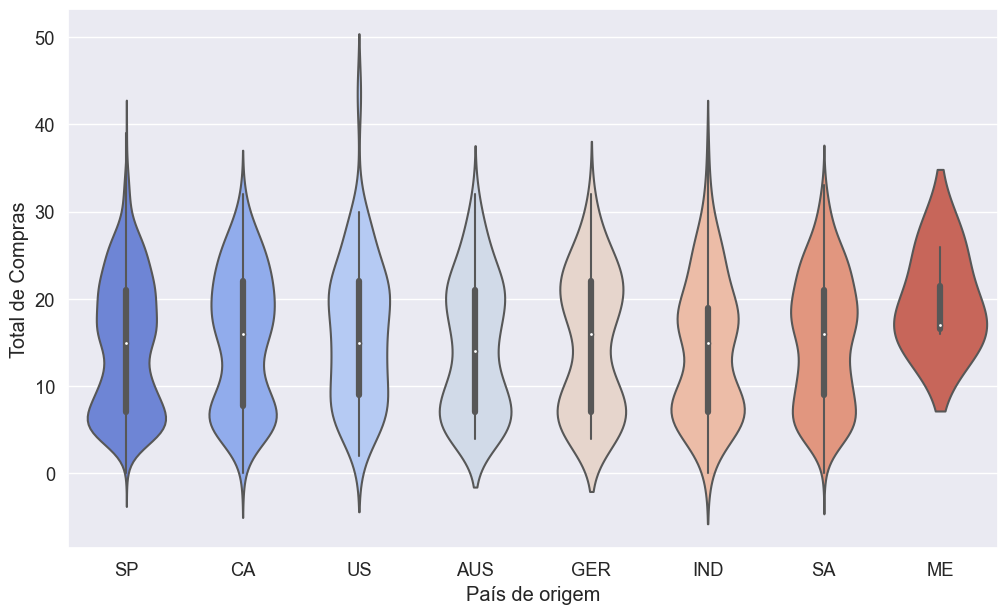

In [56]:
plt.figure(figsize = (12, 7))
sns.violinplot(x = dados['Country'], y = dados['Total Purchases'], palette= 'coolwarm')
plt.xlabel('País de origem')
plt.ylabel('Total de Compras')

#### 12 - Pie Chart com agrupamento da variável de total de compras

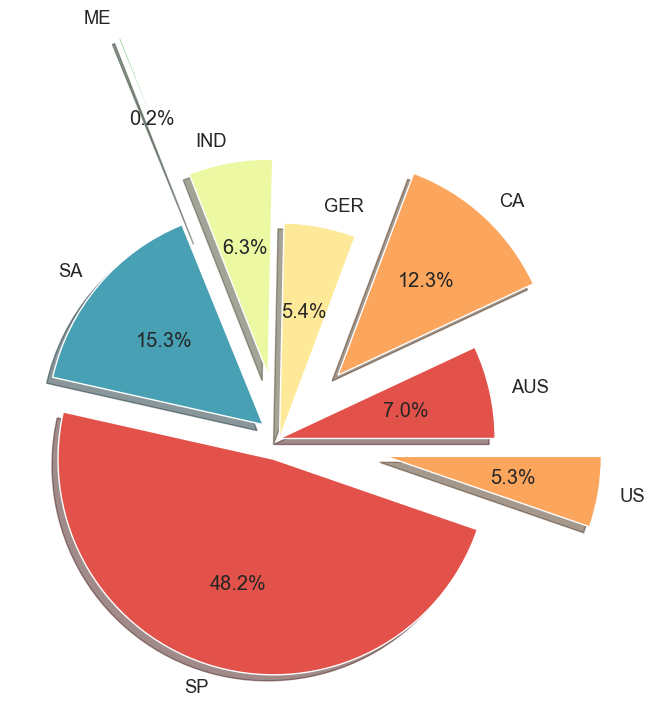

In [57]:
grouped = dados[['Total Purchases', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize= (7,7))
plt.pie(grouped['Total Purchases']['sum'],
        labels = grouped.index,
        explode = (0, 0.4, 0, 0.3, 1, 0.1, 0.1, 0.5),
        shadow = True,
        autopct= '%1.1f%%')
plt.show()

#### 13 - Countplot da variável com a data cadastro do cliente

> Aproveitamos a engenharia de atributos feita anteriormente com a data em (DtCustomer) e extraímos o mês

Text(0, 0.5, 'Número de Cadastros')

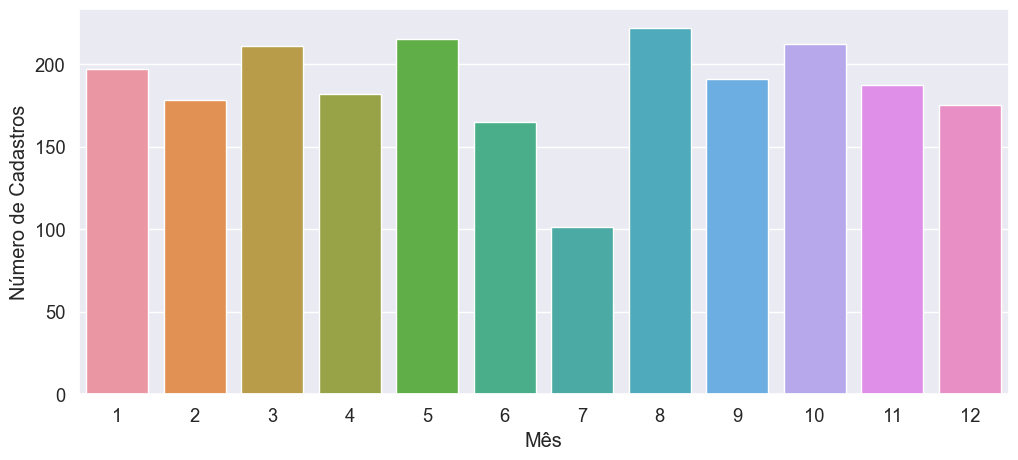

In [58]:
plt.figure(figsize= (12, 5))
sns.countplot(x = dados['Dt_Customer'].dt.month)
plt.xlabel('Mês')
plt.ylabel('Número de Cadastros')

# Fim